In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
gun = pd.read_csv('./data/gun-violence-data_01-2013_03-2018.csv')
gun[:5]

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
gun['date'] = pd.to_datetime(gun['date'])
gun['date'] = pd.DatetimeIndex(gun['date'])

In [4]:
year = pd.DatetimeIndex(gun['date']).year.value_counts()

In [5]:
year = year.rename_axis("Year")

<AxesSubplot:title={'center':'Number of Gun violence by Year'}, xlabel='Year'>

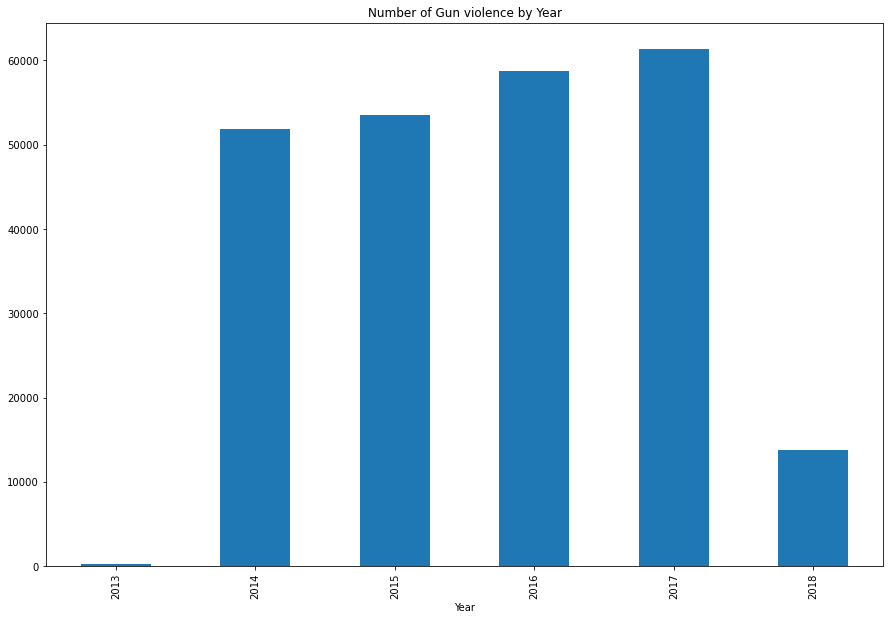

In [6]:
year.sort_index().plot(
    kind='bar',
    title = "Number of Gun violence by Year",
    figsize=(15,10)
)

<AxesSubplot:title={'center':'Number of Deaths in every states'}, ylabel='state'>

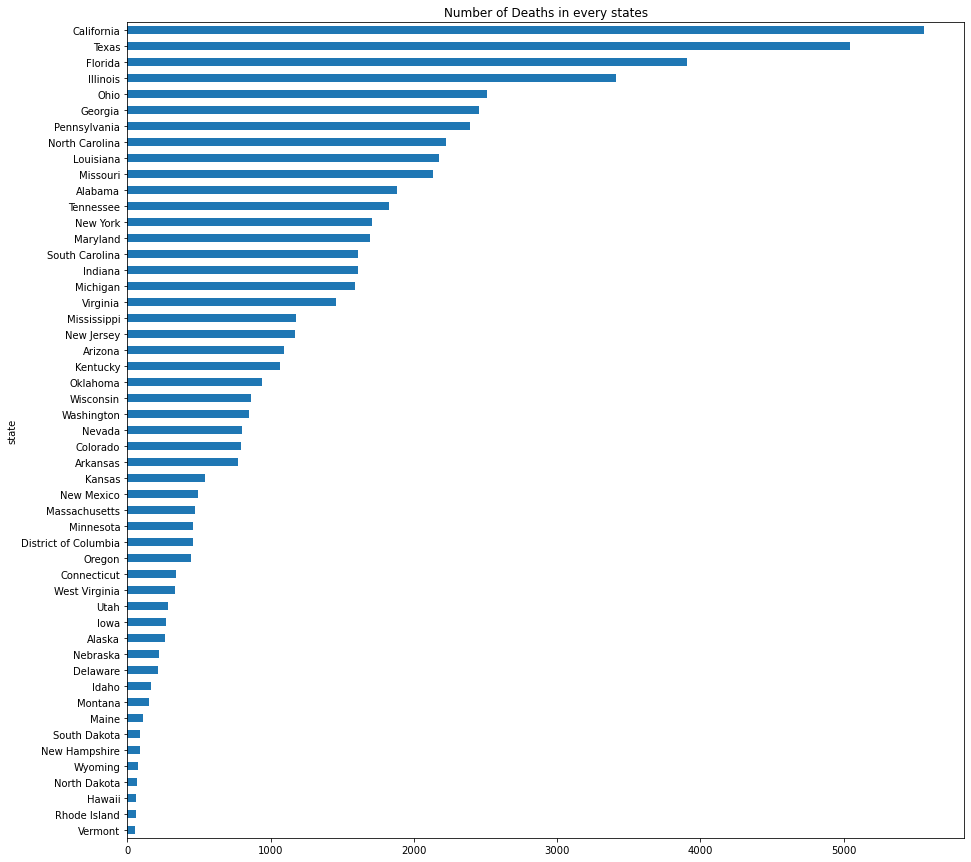

In [7]:
gun.groupby('state').agg('sum')['n_killed'].sort_values().plot(
    kind='barh', 
    figsize = (15,15), 
    title="Number of Deaths in every states"
)

<AxesSubplot:title={'center':'Number of Deaths in every states'}, ylabel='state'>

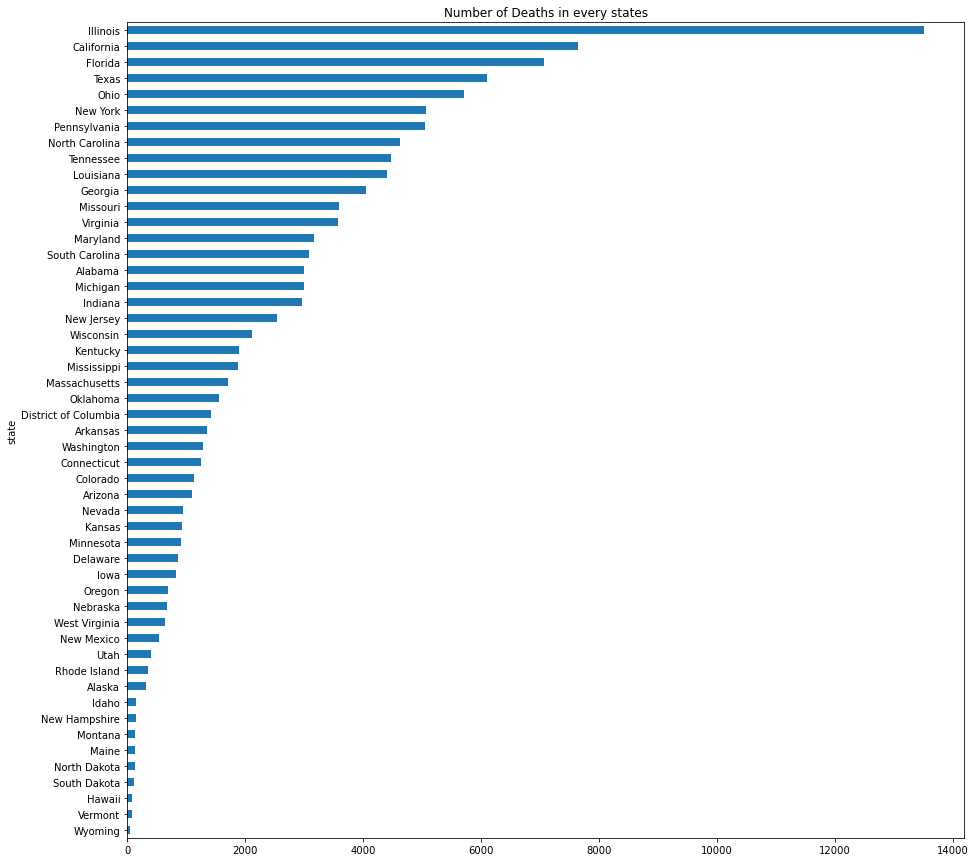

In [8]:
gun.groupby('state').agg('sum')['n_injured'].sort_values().plot(
    kind='barh', 
    figsize = (15,15), 
    title="Number of Deaths in every states"
)

Graph with 52 nodes and 51 edges


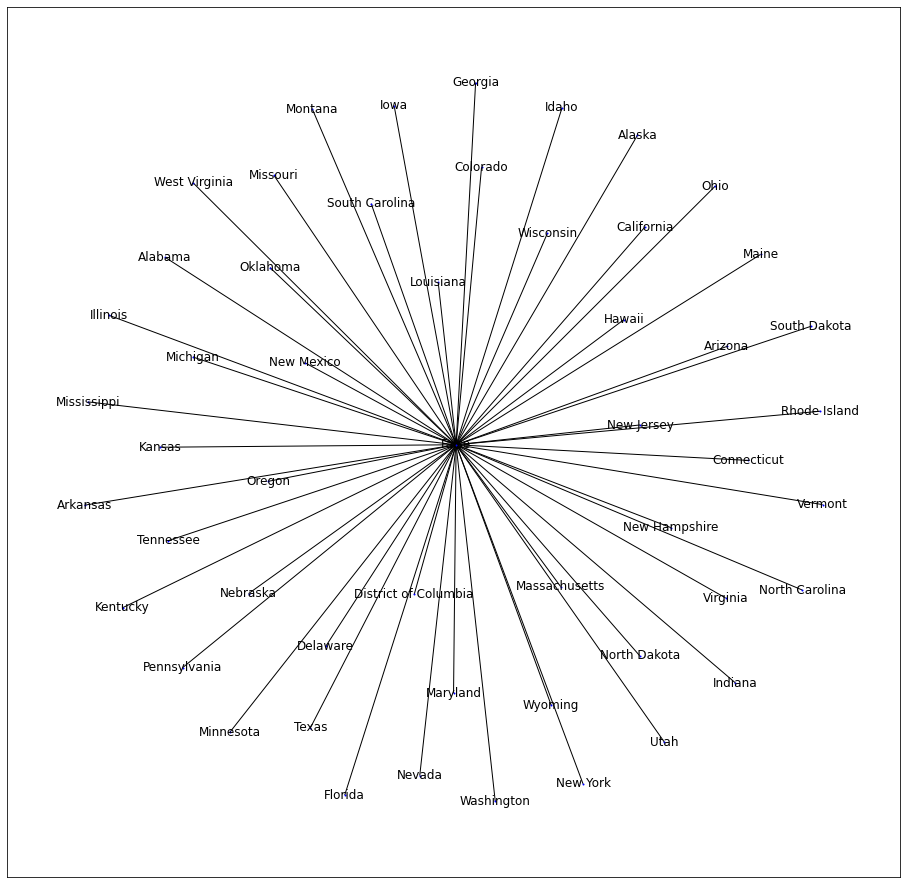

In [9]:
# networkx graph
g = nx.Graph()
g = nx.from_pandas_edgelist(gun, source = 'incident_url_fields_missing', target = 'state')
print(nx.info(g))

plt.figure(figsize=(16, 16))
pos = nx.spring_layout(g, k = 0.3985)
nx.draw_networkx(g,pos, node_size = 1, node_color = 'blue')
plt.show()